In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
data1 = pd.read_csv('/content/soil_wellbeing_index.csv')

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   raw_moisture          1000 non-null   int64  
 1   temperature           1000 non-null   float64
 2   soil_wellbeing_index  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [50]:
data1.head()

,raw_moisture,temperature,soil_wellbeing_index
0,792,17.95,47.00
1,295,37.79,55.03
2,638,24.69,79.16
3,543,17.07,84.14
4,590,26.89,100.00


In [51]:
data1.shape

(1000, 3)

In [52]:
data1.isnull().sum()

,0
raw_moisture,0
temperature,0
soil_wellbeing_index,0


In [53]:
data1['moisture_percent'] = 100 - (data1['raw_moisture'] / 1023) * 100

In [55]:
data1.head()

,raw_moisture,temperature,soil_wellbeing_index,moisture_percent
0,792,17.95,47.00,22.580645
1,295,37.79,55.03,71.163245
2,638,24.69,79.16,37.634409
3,543,17.07,84.14,46.920821
4,590,26.89,100.00,42.326491


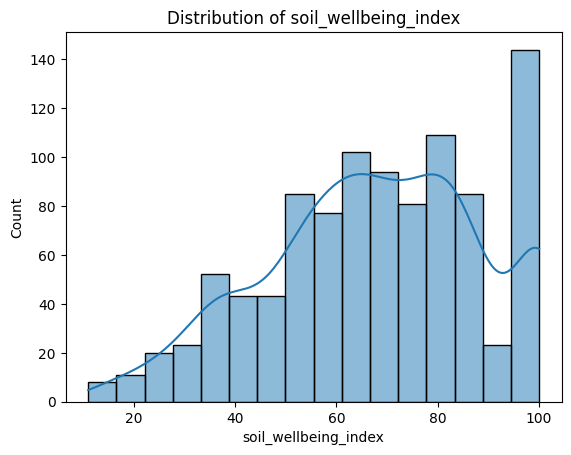

In [56]:
sns.histplot(data1['soil_wellbeing_index'], kde=True)
plt.title("Distribution of soil_wellbeing_index")
plt.show()

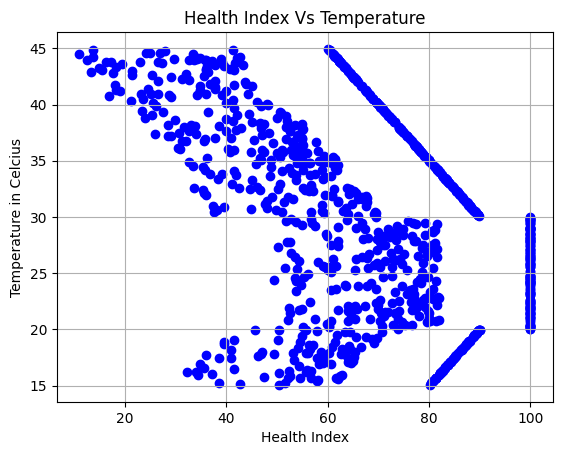

In [60]:
# Scatter plot without connecting the dots
plt.scatter(data1['soil_wellbeing_index'], data1['temperature'], color='b', marker='o')

# Adding labels and title
plt.xlabel('Health Index')
plt.ylabel('Temperature in Celcius')
plt.title('Health Index Vs Temperature')

# Displaying the plot
plt.grid(True)
plt.show()


In [61]:
y = data1['soil_wellbeing_index']
x = data1.drop(['soil_wellbeing_index'], axis=1)

In [62]:
x

,raw_moisture,temperature,moisture_percent
0,792,17.95,22.580645
1,295,37.79,71.163245
2,638,24.69,37.634409
3,543,17.07,46.920821
4,590,26.89,42.326491
...,...,...,...
995,212,27.47,79.276637
996,725,36.00,29.130010
997,395,20.31,61.388074
998,239,44.00,76.637341


In [63]:
y

,soil_wellbeing_index
0,47.00
1,55.03
2,79.16
3,84.14
4,100.00
...,...
995,70.87
996,46.96
997,100.00
998,36.03


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [67]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Linear Regression - MAE: 12.0172, MSE: 231.4220, RMSE: 15.2126, R2: 0.4941


In [66]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Decision Tree - MAE: 1.1457, MSE: 7.6588, RMSE: 2.7674, R2: 0.9833


In [68]:

model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Random Forest - MAE: 0.8994, MSE: 3.9477, RMSE: 1.9869, R2: 0.9914


In [69]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Gradient Boosting - MAE: 0.9289, MSE: 2.0110, RMSE: 1.4181, R2: 0.9956


In [70]:
model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"SVR - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


SVR - MAE: 11.3289, MSE: 190.9197, RMSE: 13.8174, R2: 0.5827
